In [57]:
# mengimpor data dari berkas CSV menggunakan pustaka pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%time data = pd.read_csv("employee.csv", index_col=0)

Wall time: 119 ms


In [13]:
data.shape

(54808, 13)

In [14]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'performance_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   no_of_trainings      54808 non-null  int64 
 6   age                  54808 non-null  int64 
 7   performance_rating   50684 non-null  object
 8   length_of_service    54808 non-null  int64 
 9   KPIs_met >80%        54808 non-null  object
 10  awards_won?          54808 non-null  object
 11  avg_training_score   54808 non-null  int64 
 12  is_promoted          54808 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.9+ MB


In [3]:
# menampilkan beberapa sampel data
data.sample(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
12609,Sales & Marketing,region_15,Bachelor's,female,sourcing,1,29,Good,7,No,No,47,No
26296,Technology,region_2,Bachelor's,female,other,1,48,Low,8,No,No,78,No
19768,Technology,region_26,Bachelor's,male,sourcing,1,32,Great,2,No,No,80,No
62205,Technology,region_22,Bachelor's,female,other,1,34,Good,2,No,No,77,No
40723,Procurement,region_2,Master's & above,male,sourcing,1,36,Excellent,5,No,No,67,No


In [4]:
# menampilkan statistik deskriptif
data.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


In [9]:
# memeriksa nilai yang hilang

round(data.isnull().sum() / len(data) * 100, 4)

department             0.0000
region                 0.0000
education              4.3953
gender                 0.0000
recruitment_channel    0.0000
no_of_trainings        0.0000
age                    0.0000
performance_rating     7.5244
length_of_service      0.0000
KPIs_met >80%          0.0000
awards_won?            0.0000
avg_training_score     0.0000
is_promoted            0.0000
dtype: float64

### Menganalisis Variabel Secara Individual

In [24]:
numerical_vars = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
categorical_vars = ['department', 'region', 'education', 'recruitment_channel', 'performance_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [25]:
employee = data[numerical_vars+categorical_vars]

In [26]:
employee.shape

(54808, 12)

### Memahami Variabel Utama

In [27]:
# descriptive statistics summary
employee['performance_rating'].describe()

count     50684
unique        5
top       Great
freq      18618
Name: performance_rating, dtype: object

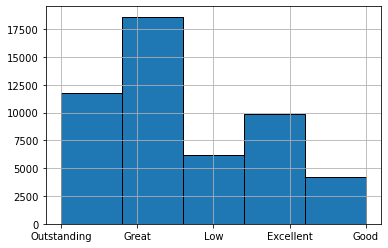

In [31]:
employee['performance_rating'].hist(edgecolor='black', bins=5);

### Variabel Numerikal

In [34]:
data[numerical_vars].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


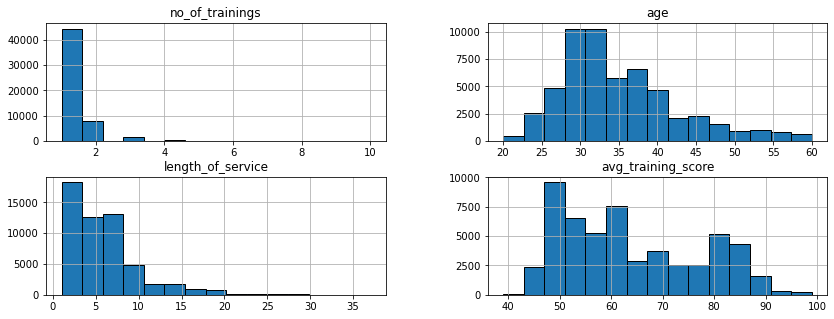

In [38]:
data[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout= (2,2));

### Latihan 2.4 | Variabel Kategorikal

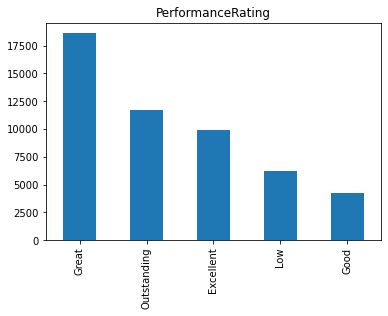

In [39]:
data['performance_rating'].value_counts().plot(kind='bar', title='PerformanceRating');

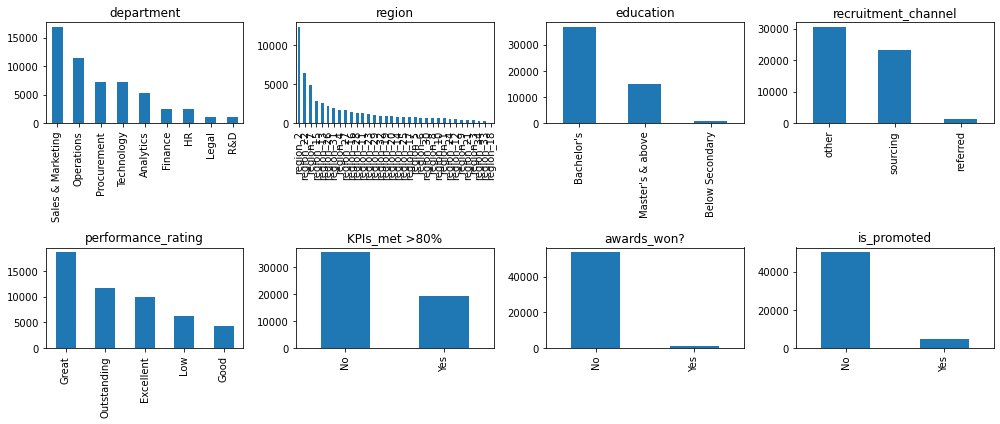

In [44]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [48]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [49]:
levels_to_keep = employee[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

department             [Sales & Marketing, Operations, Procurement, T...
region                 [region_2, region_22, region_7, region_15, reg...
education                [Bachelor's, Master's & above, Below Secondary]
recruitment_channel                          [other, sourcing, referred]
performance_rating            [Great, Outstanding, Excellent, Low, Good]
KPIs_met >80%                                                  [No, Yes]
awards_won?                                                    [No, Yes]
is_promoted                                                    [No, Yes]
dtype: object

In [50]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(levels_to_keep[var])]

In [51]:
employee.shape

(48660, 12)

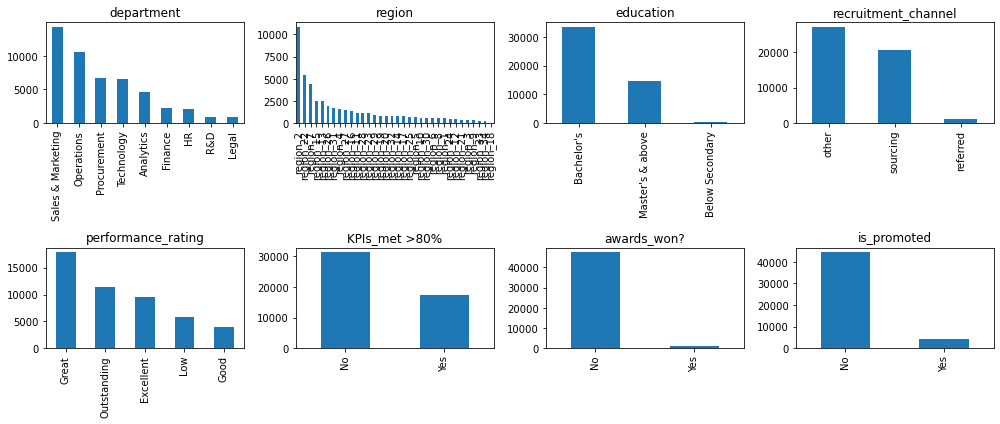

In [53]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

### Hubungan Antara Variabel dengan Scatter Plot

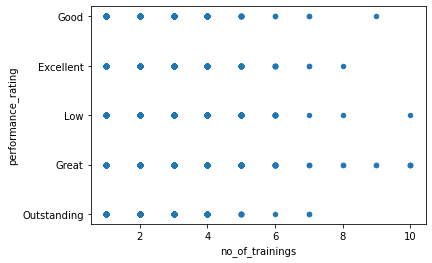

In [59]:
employee.plot.scatter(x='no_of_trainings', y='performance_rating');

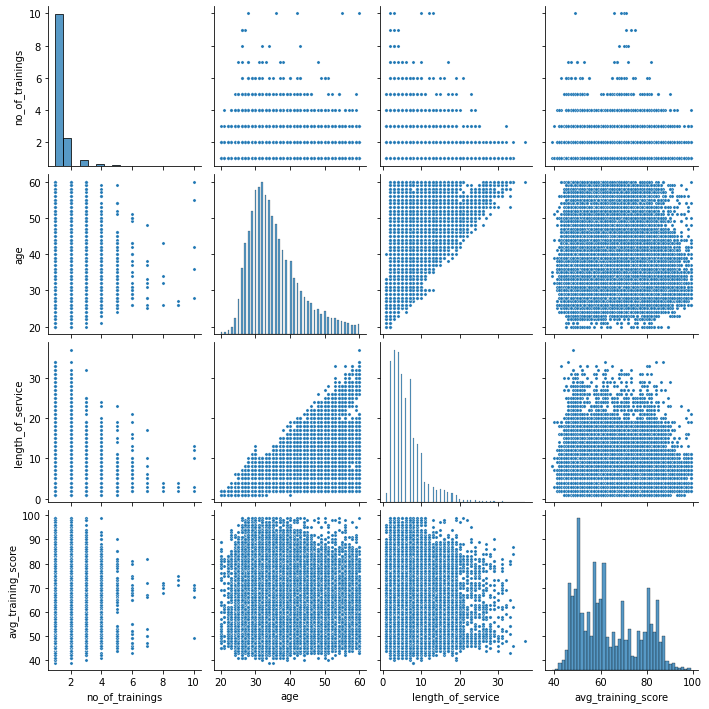

In [58]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

In [61]:
employee[numerical_vars].corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.083590,-0.055440,0.042033
age,-0.083590,1.000000,0.620348,-0.066214
length_of_service,-0.055440,0.620348,1.000000,-0.047461
avg_training_score,0.042033,-0.066214,-0.047461,1.000000


In [63]:
correlations = employee[numerical_vars].corr()

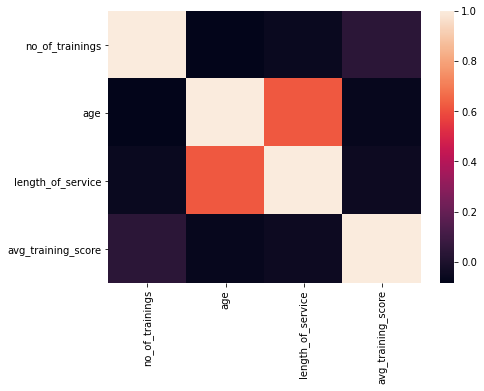

In [64]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax=ax);

### Hubungan Antara Variabel dengan Box Plot

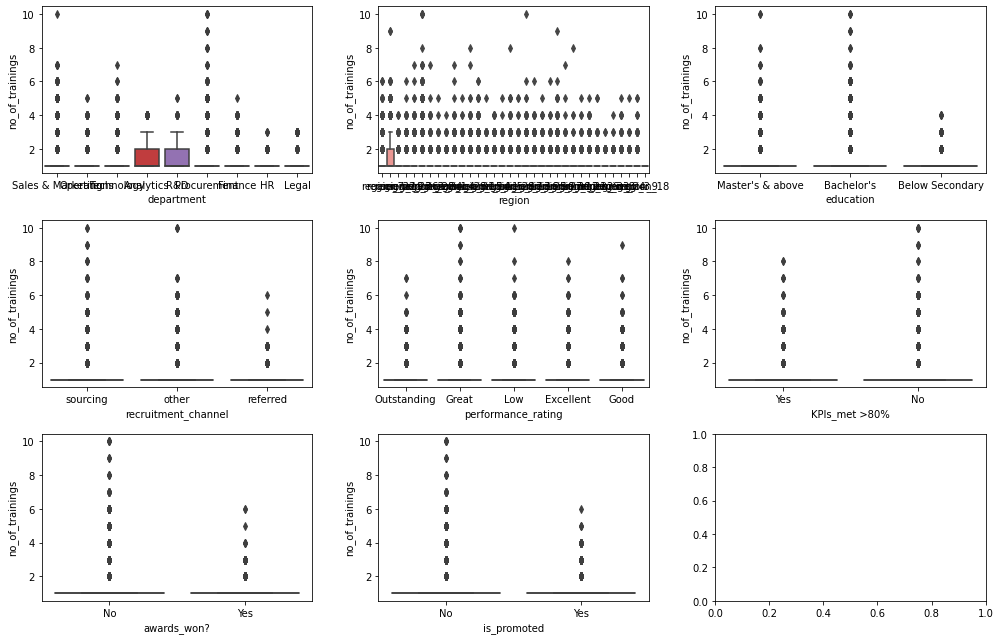

In [68]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='no_of_trainings', data=employee, ax=subplot)
    
    fig.tight_layout()